# Лабораторная работа 1
# Задача о падении тела. Построение графиков функций

Компьютерная математика , ММФ, БГУ
Гимбицкий М.Д. 12.02.2025

# Задание 1.1. Задача о падении тела

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$.

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы
тяжести $${\bf F} = m (0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.

**Данные**.
- Задача рассматривается при при следующих значениях параметров: $h_{start} =  $ 1 m , $h_{end} =  $ 3 m, $T = $ 3 s,  $s_{end} = $ 5 m.
- угол запуска тела  $\alpha$ не известен.
- Начальный момент времени движения тела полагаем равным нулю: $t=$ 0.
- Значение массы $m$ тела не повлияет на функции перемещения тела.

**Задания для выполнения**.
- $\color{red}\text{Определите}$ функцию перемещения тела $(s_{x}(t),s_{y}(t)) $ под действием силы тяжести, где $s_{x}(t),s_{y}(t)$ $-$ горизонтальная и вертикальная
составляющая положения тела в момент времени $t$, соответственно.

- $\color{red}\text{Найдите}$  угол запуска тела $\alpha$.
- $\color{red}\text{Постройте}$ график траектории движения тела $(s_{x}(t),s_{y}(t)) $ для $t \in [0, T] $


# Выполнение Задания 1.1
## Этап 1. Импортирование модулей
Импортируем модуль `math` с математическими функциями из стандартной
библиотеки:


In [6]:
import math

In [7]:
math.sin(math.pi/2)

1.0

Импортируем расширение `numpy` и создадим псевдоним `np` для доступа к
инструментам модуля, не используя имя `numpy`

In [8]:
import numpy as np

Расширение `numpy` основано на работе со структурой данных массив `( ndarray )`.
Массив `( ndarray )` не является встроенным типом данных Python, он является
базовым типом расширения `numpy` .
Импортируем модуль `pyplot` из пакета `matplotlib` для построения графиков.
Для этого примененим синтаксис `<имя пакета>.<имя модуля в пакете>` и
создадим псевдоним имени модуля `plt`

In [9]:
import matplotlib.pyplot as plt

Импортируем модуль constants из пакета расширений `scipy` с псевдонимом
`const` . Модуль constants предоставляет доступ к значениям физических
констант

In [10]:

import scipy.constants as const



Импортируем модуль `sympy` для символьных вычислений в Python

In [11]:
import sympy

## Этап 2. Создание переменных

**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания (`=`) записывается переменная, справа — выражение,
результатом вычисления которого является объект: `переменная = объект` . Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
`first_variable = 1` . Объявлять переменные перед их инициализацией не нужно.

In [12]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

In [13]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

Отобразить значение переменной можно, указав ее имя в ячейке ввода в
последней строке или с использованием встроенной функции `print`


In [14]:
print(h_start, h_end)

1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:

In [15]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Привожу}$ несколько примеров физических констант из модуля
`constants` пакета расширений `scipy`:

In [16]:
c=const.c
c

299792458.0

In [17]:
e=const.e
e

1.602176634e-19

In [18]:
k=const.k
k

1.380649e-23

Временной отрезок $[0, T]$ представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке $[0, T]$  с шагом
0.01 двумя способами: на основе встроенного типа список ( `list` ) и на основе
массива ( `ndarray` ) из расширения `numpy`

In [19]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)

$\color{red}\text{Сформулируем}$ спецификации функций `range` и `arange`,привидите пример.

In [20]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
print(np.arange(1,10,+1))

[1 2 3 4 5 6 7 8 9]


Запомните, что после создания списка (`list`)его размер можно, после создания массива (`ndarray`)его размер изменить нельзя.

# Этап 3. Определение функции перемещения и нахождение угла запуска тела

Полагаем, что начало прямоугольной декартовой системы координат соответствует
уровню земли. Тогда в начальный момент движения тела $t=0$ имеем, что $$s_x(0)=0, s_y(0)=h_{start} $$
Для постоения функции перемещения $(s_{x}(t),s_{y}(t))$ воспользуемся вторым законом Ньютона $$ma=F$$
где $m$ - масса тела,ускоренная движения тела a=$(s_{x}''(t),s_{y}''(t))$ и приложенная сила **F** = $m(0,-g)$. В результате имеем два уравнения, что $$s_{x}''(t)=0,     s_{y}''(t)=-g$$
На основании уравнений с учетом начальных условий можно записать аналитический вид для функций $s_{x}(t)$ и $s_y(t)$
$$s_{x}(t)=s_{x}(0)+v0_{x}t=0+v0{x}t,$$
 $$s_{y}(t)=s_y(0)+v0_yt-\frac{g}{2}t^2=h_{start}+v0_yt-\frac{g}{2}t^2,$$
 где v0=$(v0_x,v0_y)$обозначает неизвестную скорость движения тела в начальный момент времени $t=0$

Из условия задачи имеем, что $s_{x}(T) = s_{end}$. Из этого соотношения находим значение для $v0_{x}$

In [22]:
v0_x = s_end/T
v0_x

1.6666666666666667

Из условия задачи имеем, что $s_{y}(T) = s_{end}$. Из этого соотношения находим значение для $v0_{y}$

In [23]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела $\alpha$ определяем из соотношения $tan\alpha=\frac{v0_y}{v0_x}$

In [24]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид

In [25]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [26]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

# Этап 4. Построение графика траектории движения тела 

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений -координат точек графика функции и последовательность соответствующих значений -координат точек
графика функции.
На Этапе 2 было создано две последовательности равномерно распределенных
чисел на отрезке $[0,T]$  с шагом 0.01 для переменной $t$

In [27]:
t_list, t_array;

Определим списки чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в моменты времени `t_list` с использованием
формул, полученных на Этапе 3:

In [28]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в момент времени `t_array` :

In [29]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

*Обратим внимание*, что арифметические действия ( +, -,* , /, **) с массивами
`ndarray` выполняются **поэлементно** без использования дополнительного
синтаксиса.

Строим график траектории движения тела, используя инструменты модуля `pyplot`
пакета `matplotlib` . Смотрите **Help | Matplotlib Reference** для справочной
информации по используемым функциям: `figure` , `plot` , `title` , `xlabel` ,
`ylabel` , `axis` , `xlim` , `ylim` .


(np.float64(0.0), np.float64(5.0), np.float64(0.0), np.float64(14.0))

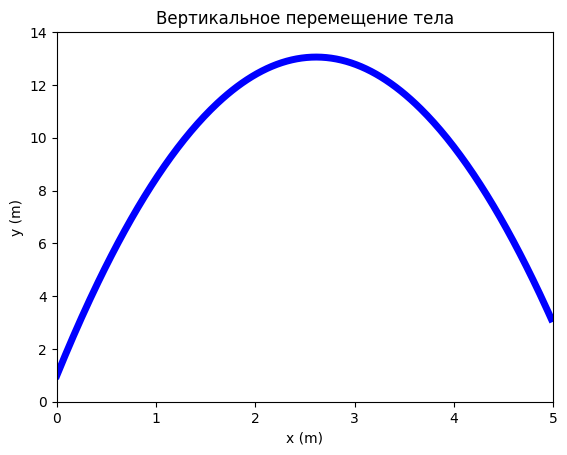

In [30]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])

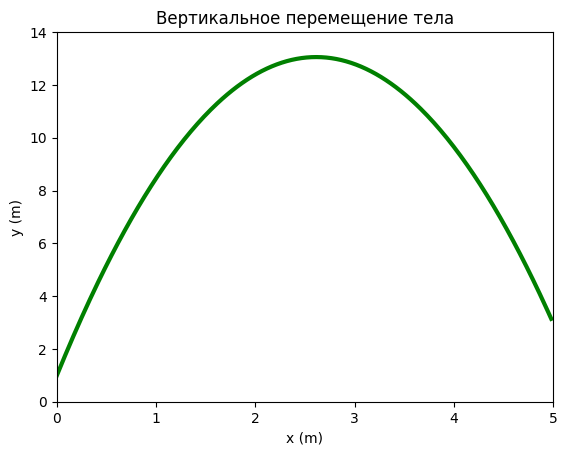

In [31]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

# Задание 1.2. Определение момента времени касания телом земли

Для задачи о падении тела из Задания 1.1 $\color{red}\text{найдем}$ момент времени касания телом земли (время нахождения тела в воздухе).

Выполнение задания осуществим на основе двух подходов.

*Подход 1* (**точное решение**): время касания телом земли находим как точное решение уравнения $s_y(t)=0$;

*Подход 2* (**приближенное решение**)

-Постойте последовательность $s_y$ на временом отрезке $[0,t_{stop}]$,чтобы момент касания ела земли $t^*$ попадал в выбранный отрезок, т.е $t^*\in[0,t_{stop}]$.  
    Отметим, что $t_{stop}>T$, где значение $T$ задается в Задании 1.1.
- Найдите в построенной последовательности $s_y$ два соседних элемента последовательности, значения которых меняют знак. Т.е. найдем значение индекса $k$, для которого $s_y[k]s_y[k+1]<0$. Это будет озночать, что $0\in(s_y[k],s_y[k+1])$.
- Постоем прямую линию $s_{lin}(t)$, проходящую через две точки $(t[k],s_y[k])$
и $t[k+1],s_y[k+1]$  и найдите значение $t^*\in(t[k],t[k+1])$ из условия $s_lin(t^*)=0$. Найденное значение $t^*$, будет соответствовать точке $(t^*,0)$ на прямой $s_{lin}(t^*)=0$. Найденное значение $t^*$, будет соответствовать точке $(t^*,0)$ на прямой $s_{lin}(t)$. $\color{red}\text{Приведем}$ в документе формулы для прямой $s_{lin}(t)$ и для вычисления $t^*$.
    $\color{red}\text{Сравним}$ точное решение (*Подход 1*) и приближенное решение (*Подход 2*), вычислив относительную ошибку.

# Выполнение Задания 1.2

Рассмотрим *Подход 1* выполнения Задания 1.2.

Для решения алгебраического уравнения $s_y(t)=0$ воспользуемся функцией
`solve` из модуля `sympy` , которая предназначена для решения алгебраических
уравнений и систем уравнений. Для выполнения функции `solve` предварительно с
помощью функции `symbols` необходимо создать **символьную переменную**,
относительно которой будет определено уравнение.

In [32]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [33]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

Задание 1.2 на основе *Подхода 2:*
- для поиска индекса $k$, для которго $s_y[k]s_y[k+1]<0$, используйте цикл `for` по последовательности $s_y$ в сочетании с `enumerate`
- для вычисления $t^*$ используем постороенную форму.

In [34]:
t_list=[i*step for i in range(int(1.5*T/step))]
s_y  =[h_start+v0_y*t-g*t]

$\color{red}\text{Сформулируем}$ спецификации функций `symbols` и `solve` из
модуля `sympy`.$\color{red}\text{Приведите}$ два собственных примера решения алгебраических уравнений

In [35]:
from sympy import symbols, Eq, solve

x = symbols('x')

equation = Eq(x**3 - 6*x**2 + 11*x - 6, 0)

solution = solve(equation, x)
print(solution)  

[1, 2, 3]


In [36]:
from sympy import symbols, Eq, solve

x = symbols('x')
equation = Eq(x**2 + 3*x + 2, 0)
solution = solve(equation, x)
print(solution)  

[-2, -1]


# Задание 1.3. Построение секущей, касательной и нормали к графику функции

$\color{red}\text{Построим}$ в одной графической области:
- график траектории движения тела $ (s_x(t),s_y(t))$ для $t \in[0,T]$ из Задания 1.1;
- график секущей прямой к траектории движения тела, проходящей через начальную точку при $t=0$ и конеччную точку при $t=T$
- график касательной прямой к траектории движения тела в начальной точке при $t=0$
- график нормальной прямой к траектории движения тела в начальной точке при $t=0$

Построение графиков функций осуществляется по координатам точек графика. Для
построения графиков прямых линий (секущая, касательная, нормаль) используйте
только две точки.
## Выполнение Задания 1.3
Подготовим необходимые данные для построения секущей прямой к траектории
движения тела.

Воспользуемся *векторно-параметрическим уравнением прямой* для заданной
точки $p_{start}$ , лежащей на прямой, и заданного направляющего вектора $a$

$p(t) = p_{start} + at$

Направляющий вектор можно определить как $a = p_{end} - p_{start}$, где точка $p_{end}$ лежит на прямой и отлична от точки $p_{start}$

Введем новые переменные для описания начальной точки $p_{start}$ и конечной точки $p_{end}$  через их координаты. Для новых переменных используем тип массив
( `ndarray` ) из `numpy` . Представление координат точек в виде массивов иногда эффективнее, чем представление в виде списков, для дальнейшей работы с
координатами.

In [37]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end


(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [38]:
a = p_end-p_start

Для построения графика прямой достаточно задания двух точек, лежащих на
прямой:

In [39]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной
графической области:

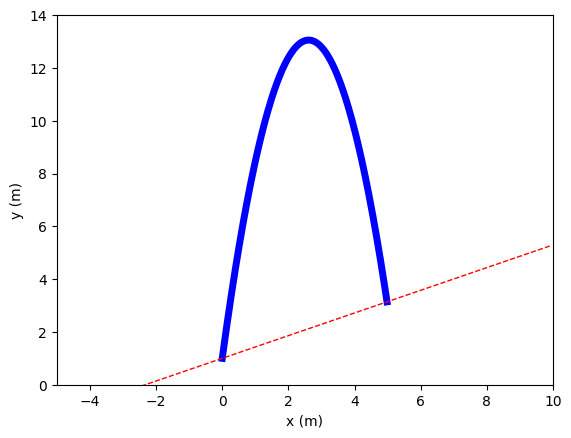

In [40]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--'
,color='red',lw=1) 
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);


$\color{red}\text{Построим}$ график касательной прямой к траектории движения
тела в одной графической области с траекторией движения и секущей прямой в точке серединке по $x$

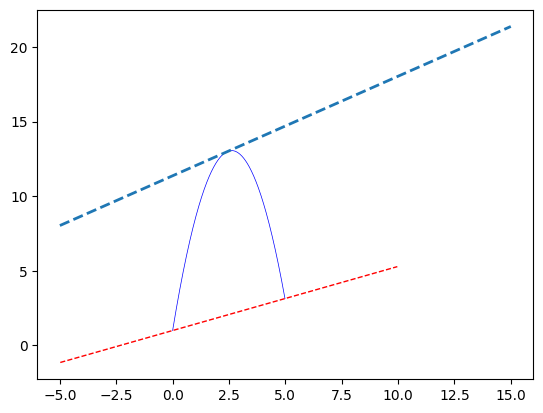

In [41]:
point_index = len(s_x_array) // 2
x_start = s_x_array[point_index]
y_start = s_y_array[point_index]
k = (v0_y - g * t_array[point_index])
x = np.linspace(-5, 15, 100)
y = k * (x - x_start) + y_start
plt.plot(s_x_array, s_y_array, 'b-', lw=0.5)
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=1)
plt.plot(x, y, '--', lw=2)

**$\color{red}\text{Вычисление}$ углового коэффициента (k):**
- Здесь мы рассчитываем угловой коэффициент $k$, который используется для определения наклона касательной линии в выбранной точке.
 - v0_y — начальная скорость по оси y, g — ускорение свободного падения, а t_array[point_index] — время в момент, соответствующий средней точке. Угловой коэффициент рассчитывается как разница между начальной скоростью и произведением ускорения на время.

$\color{red}\text{Сформулируем}$ уравнение нормальной прямой к
траектории движения тела в момент времени $t=0$ , используя свойство
перпендикуляртности каксательной и нормальной прямых.

1.**Определение точки на траектории:**
- В момент времени $t=0$ у нас есть координаты $(x_0,y_0):$    
    x_0 = s_x_array[0]

    y_0 = s_y_array[0]

2. **Вычисление углового коэффициента касательной:**

- Угловой коэффициент касательной в момент времени $t=0$
$$k_{кас}=\frac{dy}{dx}$$
Предполагая, что у вас есть уравнение движения например, уравнение траектории $y=f(x)$, производная в точке $t=0$ даст этот коэффициент.
3. **Угловой коэффициент нормальной прямой:**
- Угловой коэффициент нормальной прямой:$$k_{норм}=-\frac{1}{k_{кас}}$$
4.**Уравнение нормальной прямой:**
- Уравнение нормальной прямой в точке $(x_0,y_0):$
$$y-y_0=K_{норм}(x-x_0)$$

$\color{red}\text{Построим}$ график нормальной прямой к траектории движения
тела в момент времени $t=0$ в одной графической области с траекторией
движения, секущей прямой и касательной прямой.

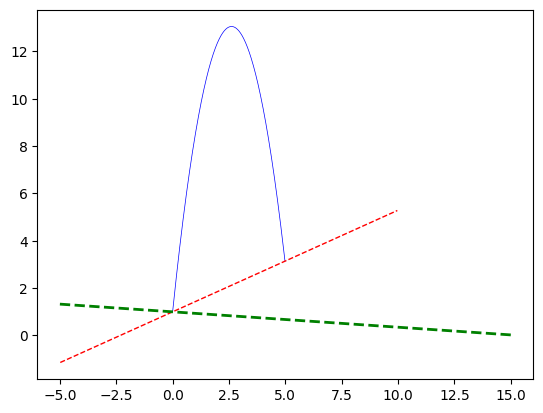

In [42]:
normal_x = np.linspace(-5, 15, 100)
k_norm = -1 / v0_y
normal_y = k_norm * (normal_x - p_start[0]) + p_start[1]
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=0.5)
plt.plot(p[:, 0], p[:, 1], '--', color='red', lw=1)
plt.plot(normal_x, normal_y, '--', lw=2, color='green')

# Задание 1.4. Построение графиков функций

$\color{red}\text{Построим}$ графики функций на плоскости по координатам точек согласно варианту. Функция задана.

а) полярным уравнением $p=p(\varphi)$ в полярной системе координат $(\varphi,p)$ 

б) параметрическим уравнением $x=x(t),y=y(t)$ в декартовой системе координат $(x,y)$

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений $x(\varphi)$-координат точек графика функции и последовательность соответствующих значений $y(p)$-координат точек графика функции.


## Выполнение задания 1.4.
**Вариант 2**

- Функция задана полярным уравнением $p=p(\varphi)$ в полярной системе координат $(\varphi,p)$

а) *Роза* $p=a\sin(\frac{m}{n}\varphi),a\in\mathbb{R},m,n$-натуральные нечетные, $m\neq n. $

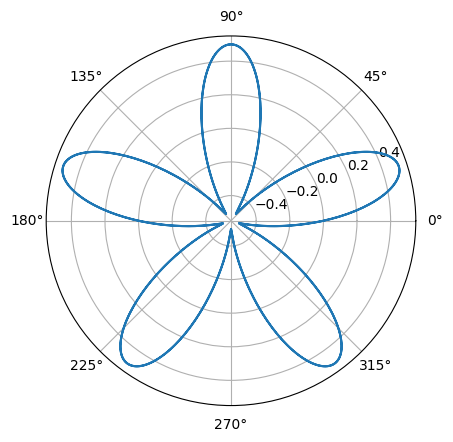

In [43]:
a=0.5
m=15
n=3
phi = np.arange(0,4 * np.pi, 0.01)
p = a*np.sin((m/n)*phi)
plt.polar(phi,p)


- Функция задана параметрическим уравнением $x=x(t),y=y(t)$ в декартовой системе координат $(x,y)$

$б)$ $x=\sqrt{1-t^2}, y=\tan\sqrt{1+t}.$

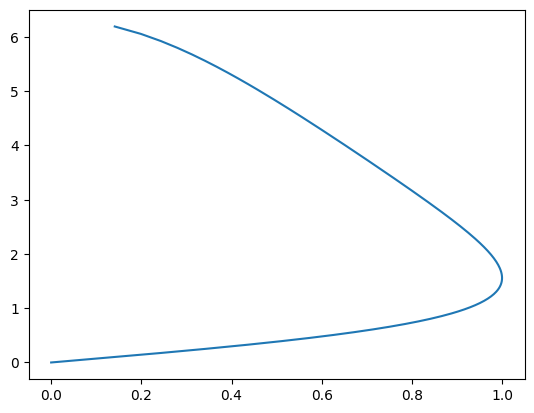

In [44]:

t = np.arange(-1, 1, 0.01)  
x = np.sqrt(1 - t**2)
y = np.tan(np.sqrt(1 + t))
plt.plot(x, y)